# Hidden Markov Model From Scratch

we'll model a classic example:
- Hidden states: Rainy, Sunny
- Observations: Walk, Shop, Clean

#### 1. Define the HMM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hidden states
states = ["Rainy", "Sunny"]

# Observations
observations = ["Walk", "Shop", "Clean"]

# Initial probabilites π
pi = np.array([0.6, 0.4])

# Transition matrix A
A = np.array([
    [0.7, 0.3],  # Rainy -> Rainy, Sunny 
    [0.4, 0.6]   # Sunny -> Rainy, Sunny
])

# Emission matrix B
B = np.array([
    [0.1, 0.4, 0.5],   # Sunny -> Walk, Shop, Clean
    [0.6, 0.3, 0.1]    # Sunny -> Walk, Shop, Clean
])

#### 2. Forward Algorithm (Evaluation)
Compute probability of an observation sequence

In [18]:
def forward(obs_seq, pi, A, B):
    T = len(obs_seq)
    N = len(pi)

    alpha = np.zeros((T, N))

    # Initialization
    alpha[0] = pi * B[:, obs_seq[0]]

    # Recursion
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t-1] * A[:, j]) * B[j, obs_seq[t]]

    return alpha

#### 3. Example Observation Sequence

In [19]:
# Encode observations
obs_seq = [observations.index(o) for o in ["Walk", "Shop", "Clean"]]

alpha = forward(obs_seq, pi, A, B)
print("Forward probabilities:\n", alpha)
print("Sequence probability:", np.sum(alpha[-1]))

Forward probabilities:
 [[0.06     0.24    ]
 [0.0552   0.0486  ]
 [0.02904  0.004572]]
Sequence probability: 0.033612


#### 4. Viterbi Algorithm (Decoding)
Find the most likely hidden state squence.

In [21]:
def viterbi(obs_seq, pi, A, B):
    T = len(obs_seq)
    N = len(pi)

    delta = np.zeros((T, N))
    psi = np.zeros((T, N), dtype=int)

    delta[0] = pi * B[:, obs_seq[0]]

    for t in range(1, T):
        for j in range(N):
            probs = delta[t-1] * A[:, j]
            psi[t, j] = np.argmax(probs)
            delta[t, j] = np.max(probs) * B[j, obs_seq[t]]

    # Backtracking
    states_seq = np.zeros(T, dtype=int)
    states_seq[-1] = np.argmax(delta[-1])

    for t in range(T-2, -1, -1):
        states_seq[t] = psi[t+1, states_seq[t+1]]

    return states_seq

#### 5. Decode Hidden States

In [22]:
state_seq = viterbi(obs_seq, pi, A, B)
decoded_states = [states[i] for i in state_seq]

print("Most likely hidden states:")
print(decoded_states)

Most likely hidden states:
['Sunny', 'Rainy', 'Rainy']


#### 6. Visualization: HMM State Timeline
This shows how hidden states evolve over time.

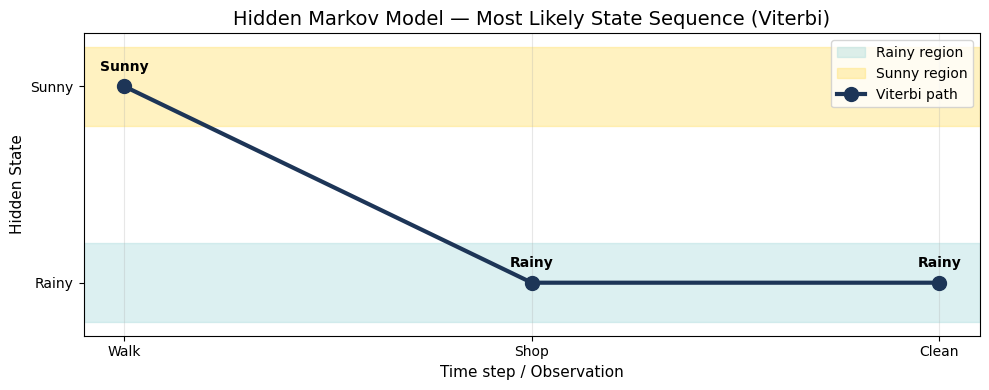

In [8]:
plt.figure(figsize=(10,4))

y = state_seq
x = np.arange(len(y))

# Background bands for states
plt.axhspan(-0.2, 0.2, color="#a8dadc", alpha=0.4, label="Rainy region")
plt.axhspan(0.8, 1.2, color="#ffe066", alpha=0.4, label="Sunny region")

# Plot state transitions
plt.plot(
    x, y,
    marker="o",
    markersize=10,
    linewidth=3,
    color="#1d3557",
    label="Viterbi path"
)

# Annotate each point with state name
for i, state in enumerate(y):
    plt.text(
        i, state + 0.08,
        states[state],
        ha="center",
        fontsize=10,
        fontweight="bold"
    )

# Axis formatting
plt.yticks([0,1], states)
plt.xticks(x, ["Walk", "Shop", "Clean"])

plt.xlabel("Time step / Observation", fontsize=11)
plt.ylabel("Hidden State", fontsize=11)
plt.title("Hidden Markov Model — Most Likely State Sequence (Viterbi)", fontsize=14)

plt.grid(axis="x", alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


#### 7. Emission Probability Heatmap
How likely each observation is from each hidden state (Which state prefers which observation.)

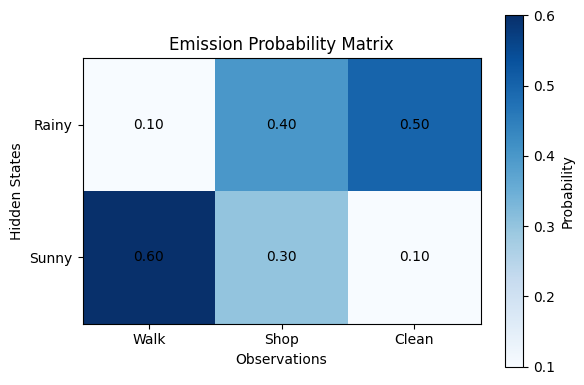

In [9]:
plt.figure(figsize=(6,4))
plt.imshow(B, cmap="Blues")

plt.xticks(range(len(observations)), observations)
plt.yticks(range(len(states)), states)

for i in range(len(states)):
    for j in range(len(observations)):
        plt.text(j, i, f"{B[i,j]:.2f}", ha="center", va="center")

plt.colorbar(label="Probability")
plt.title("Emission Probability Matrix")
plt.xlabel("Observations")
plt.ylabel("Hidden States")
plt.tight_layout()
plt.show()


#### Transition Probability Heatmap
How states transition over time (Which state is more “sticky” and which transitions are likely.)

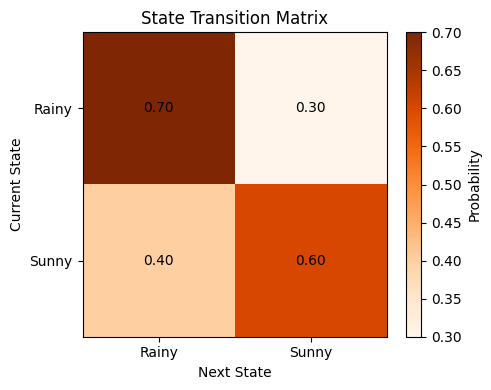

In [10]:
plt.figure(figsize=(5,4))
plt.imshow(A, cmap="Oranges")

plt.xticks(range(len(states)), states)
plt.yticks(range(len(states)), states)

for i in range(len(states)):
    for j in range(len(states)):
        plt.text(j, i, f"{A[i,j]:.2f}", ha="center", va="center")

plt.colorbar(label="Probability")
plt.title("State Transition Matrix")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.tight_layout()
plt.show()
